- **Regression** logistique : col num uniquement
score train, score test, pipeline(knnimputer, standard scaler, regression log) = dans gridsearch avec 10 crossvalidation et ressortir le score

- *Pipeline*(features num, knnimputer, scaler, et features cat à onehot (knn imputer random forest classifier,dummy regressor, reg log, KNN)) = calculer ACCURACY SCORE
et resultgrid

On peut frac = 0.25 , 0.30 ou 0.20


[mon super lien](http://cneuuziu.com)

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

In [2]:

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px


In [3]:

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.dummy import DummyClassifier
from sklearn import model_selection

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.impute import KNNImputer
from sklearn.compose import make_column_selector


In [4]:

# Feature Selection
import shap

<div style="background-color:#9dedde; padding: 10px">
<h2>Chargement des données</h2>
</div>

In [5]:
df = pd.read_csv("app_train_sample_clean.csv")
df.head(5)

,AGE,ID_CLIENT,CIBLE,YEARS_EMPLOYED,TOTAL_CREDIT,REMB_MENSUEL,CNT_FAM_MEMBERS,MONTANT_PRIX_BIENS,REVENU_TOTAL,SOURCE_EXTERNE_2,...,TYPE_REVENUS_State servant,TYPE_REVENUS_Unemployed,TYPE_REVENUS_Working,GENRE_M,NIVEAU_EDUCATION_Higher education,NIVEAU_EDUCATION_Incomplete higher,NIVEAU_EDUCATION_Lower secondary,NIVEAU_EDUCATION_Secondary / secondary special,PROPRIETAIRE_VOITURE_Y,nbr_membre
0,48,196888,0,0,1350000.0,39604.5,2.0,1350000.0,135000.0,0.761443,...,0,0,1,0,1,0,0,0,0,1
1,54,101392,0,2,573628.5,24435.0,2.0,463500.0,81000.0,0.396825,...,0,0,1,0,1,0,0,0,1,1
2,25,435135,0,2,298512.0,19948.5,1.0,270000.0,112500.0,0.385353,...,0,0,1,0,1,0,0,0,0,0
3,30,396314,0,5,218016.0,17352.0,2.0,180000.0,81000.0,0.545649,...,0,0,1,1,1,0,0,0,0,1
4,44,341153,1,0,1006920.0,42790.5,2.0,900000.0,90000.0,0.444443,...,0,0,1,0,0,0,0,1,0,1


In [6]:
df.shape

(30751, 31)

In [7]:
df.tail()

,AGE,ID_CLIENT,CIBLE,YEARS_EMPLOYED,TOTAL_CREDIT,REMB_MENSUEL,CNT_FAM_MEMBERS,MONTANT_PRIX_BIENS,REVENU_TOTAL,SOURCE_EXTERNE_2,...,TYPE_REVENUS_State servant,TYPE_REVENUS_Unemployed,TYPE_REVENUS_Working,GENRE_M,NIVEAU_EDUCATION_Higher education,NIVEAU_EDUCATION_Incomplete higher,NIVEAU_EDUCATION_Lower secondary,NIVEAU_EDUCATION_Secondary / secondary special,PROPRIETAIRE_VOITURE_Y,nbr_membre
30746,41,311641,0,3,808650.0,23773.5,3.0,675000.0,90000.0,0.621768,...,1,0,0,0,0,0,0,1,0,2
30747,38,151728,1,20,85500.0,9108.0,1.0,85500.0,40500.0,0.393861,...,0,0,1,1,0,0,0,1,0,0
30748,44,384640,0,-1000,247500.0,12375.0,2.0,247500.0,69750.0,0.673987,...,0,0,0,0,1,0,0,0,1,1
30749,60,437079,0,-1000,270000.0,9828.0,1.0,270000.0,36000.0,0.546689,...,0,0,0,0,0,0,0,1,0,0
30750,59,389739,0,3,1288350.0,37053.0,1.0,1125000.0,148500.0,0.670388,...,0,0,1,0,0,0,0,1,1,0


In [14]:
df

,AGE,ID_CLIENT,CIBLE,YEARS_EMPLOYED,TOTAL_CREDIT,REMB_MENSUEL,CNT_FAM_MEMBERS,MONTANT_PRIX_BIENS,REVENU_TOTAL,SOURCE_EXTERNE_2,...,TYPE_REVENUS_State servant,TYPE_REVENUS_Unemployed,TYPE_REVENUS_Working,GENRE_M,NIVEAU_EDUCATION_Higher education,NIVEAU_EDUCATION_Incomplete higher,NIVEAU_EDUCATION_Lower secondary,NIVEAU_EDUCATION_Secondary / secondary special,PROPRIETAIRE_VOITURE_Y,nbr_membre
0,48,196888,0,0,1350000.0,39604.5,2.0,1350000.0,135000.0,0.761443,...,0,0,1,0,1,0,0,0,0,1
1,54,101392,0,2,573628.5,24435.0,2.0,463500.0,81000.0,0.396825,...,0,0,1,0,1,0,0,0,1,1
2,25,435135,0,2,298512.0,19948.5,1.0,270000.0,112500.0,0.385353,...,0,0,1,0,1,0,0,0,0,0
3,30,396314,0,5,218016.0,17352.0,2.0,180000.0,81000.0,0.545649,...,0,0,1,1,1,0,0,0,0,1
4,44,341153,1,0,1006920.0,42790.5,2.0,900000.0,90000.0,0.444443,...,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30746,41,311641,0,3,808650.0,23773.5,3.0,675000.0,90000.0,0.621768,...,1,0,0,0,0,0,0,1,0,2
30747,38,151728,1,20,85500.0,9108.0,1.0,85500.0,40500.0,0.393861,...,0,0,1,1,0,0,0,1,0,0
30748,44,384640,0,-1000,247500.0,12375.0,2.0,247500.0,69750.0,0.673987,...,0,0,0,0,1,0,0,0,1,1
30749,60,437079,0,-1000,270000.0,9828.0,1.0,270000.0,36000.0,0.546689,...,0,0,0,0,0,0,0,1,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30751 entries, 0 to 30750
Data columns (total 31 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   AGE                                             30751 non-null  int64  
 1   ID_CLIENT                                       30751 non-null  int64  
 2   CIBLE                                           30751 non-null  int64  
 3   YEARS_EMPLOYED                                  30751 non-null  int64  
 4   TOTAL_CREDIT                                    30751 non-null  float64
 5   REMB_MENSUEL                                    30751 non-null  float64
 6   CNT_FAM_MEMBERS                                 30751 non-null  float64
 7   MONTANT_PRIX_BIENS                              30727 non-null  float64
 8   REVENU_TOTAL                                    30751 non-null  float64
 9   SOURCE_EXTERNE_2                       

<div style="background-color:#d699f2; padding: 10px">
    <h2>
        <b>Analyse exploratoire</b>
    </h2>
</div>


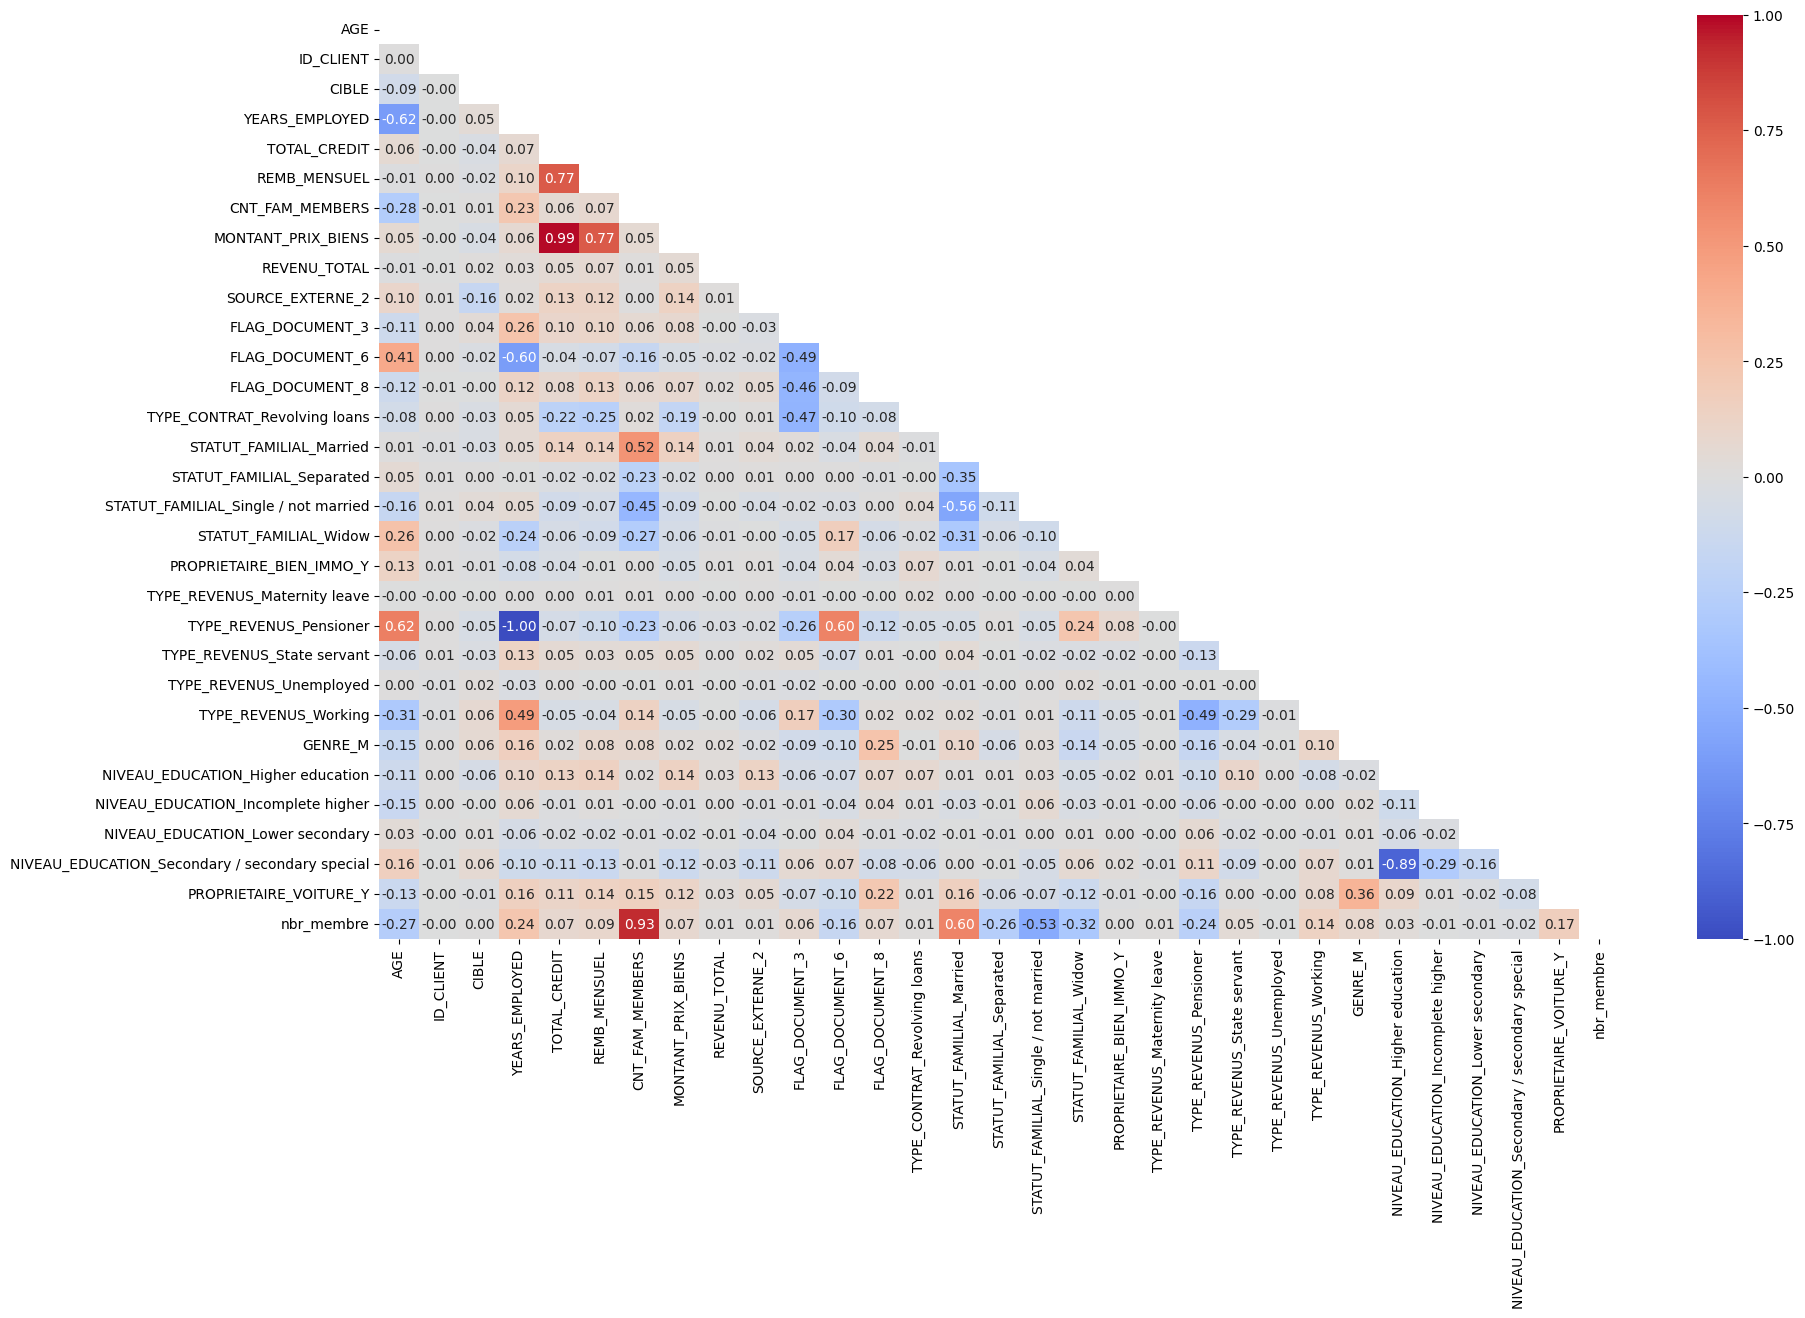

In [9]:
plt.figure(figsize=(20, 12))
corr = df.select_dtypes(include=("float64", "int64")).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, vmin=-1, vmax=1, cmap="coolwarm", fmt=".2f", mask=mask, annot=True)
plt.show()

In [10]:
#df = df.sample(frac=0.10)


In [11]:
df

,AGE,ID_CLIENT,CIBLE,YEARS_EMPLOYED,TOTAL_CREDIT,REMB_MENSUEL,CNT_FAM_MEMBERS,MONTANT_PRIX_BIENS,REVENU_TOTAL,SOURCE_EXTERNE_2,...,TYPE_REVENUS_State servant,TYPE_REVENUS_Unemployed,TYPE_REVENUS_Working,GENRE_M,NIVEAU_EDUCATION_Higher education,NIVEAU_EDUCATION_Incomplete higher,NIVEAU_EDUCATION_Lower secondary,NIVEAU_EDUCATION_Secondary / secondary special,PROPRIETAIRE_VOITURE_Y,nbr_membre
0,48,196888,0,0,1350000.0,39604.5,2.0,1350000.0,135000.0,0.761443,...,0,0,1,0,1,0,0,0,0,1
1,54,101392,0,2,573628.5,24435.0,2.0,463500.0,81000.0,0.396825,...,0,0,1,0,1,0,0,0,1,1
2,25,435135,0,2,298512.0,19948.5,1.0,270000.0,112500.0,0.385353,...,0,0,1,0,1,0,0,0,0,0
3,30,396314,0,5,218016.0,17352.0,2.0,180000.0,81000.0,0.545649,...,0,0,1,1,1,0,0,0,0,1
4,44,341153,1,0,1006920.0,42790.5,2.0,900000.0,90000.0,0.444443,...,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30746,41,311641,0,3,808650.0,23773.5,3.0,675000.0,90000.0,0.621768,...,1,0,0,0,0,0,0,1,0,2
30747,38,151728,1,20,85500.0,9108.0,1.0,85500.0,40500.0,0.393861,...,0,0,1,1,0,0,0,1,0,0
30748,44,384640,0,-1000,247500.0,12375.0,2.0,247500.0,69750.0,0.673987,...,0,0,0,0,1,0,0,0,1,1
30749,60,437079,0,-1000,270000.0,9828.0,1.0,270000.0,36000.0,0.546689,...,0,0,0,0,0,0,0,1,0,0


In [12]:
df.columns.tolist()

['AGE',
 'ID_CLIENT',
 'CIBLE',
 'YEARS_EMPLOYED',
 'TOTAL_CREDIT',
 'REMB_MENSUEL',
 'CNT_FAM_MEMBERS',
 'MONTANT_PRIX_BIENS',
 'REVENU_TOTAL',
 'SOURCE_EXTERNE_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_8',
 'TYPE_CONTRAT_Revolving loans',
 'STATUT_FAMILIAL_Married',
 'STATUT_FAMILIAL_Separated',
 'STATUT_FAMILIAL_Single / not married',
 'STATUT_FAMILIAL_Widow',
 'PROPRIETAIRE_BIEN_IMMO_Y',
 'TYPE_REVENUS_Maternity leave',
 'TYPE_REVENUS_Pensioner',
 'TYPE_REVENUS_State servant',
 'TYPE_REVENUS_Unemployed',
 'TYPE_REVENUS_Working',
 'GENRE_M',
 'NIVEAU_EDUCATION_Higher education',
 'NIVEAU_EDUCATION_Incomplete higher',
 'NIVEAU_EDUCATION_Lower secondary',
 'NIVEAU_EDUCATION_Secondary / secondary special',
 'PROPRIETAIRE_VOITURE_Y',
 'nbr_membre']

In [19]:
df['STATUT_FAMILIAL_Married']


0        1
1        0
2        0
3        1
4        1
        ..
30746    1
30747    0
30748    1
30749    0
30750    0
Name: STATUT_FAMILIAL_Married, Length: 30751, dtype: int64

In [13]:
1/0

ZeroDivisionError: division by zero

In [ ]:
# df_1 =df.loc[df.CIBLE==1]
# df_1

In [ ]:
# n = df_1.shape[0]

In [ ]:
# df_0 = df.loc[df.CIBLE==0]
# df_0 = df_0.sample(n)
# df_0

In [ ]:
# df = pd.concat([df_0, df_1], axis=0, ignore_index = True)
# df

In [ ]:
y = df["CIBLE"]

In [ ]:
y.shape

In [ ]:
# Dataframe des autres features, supression des targets
x_train = df.copy()

col_cible = ["ID_CLIENT", "CIBLE"]
x_train.drop(col_cible, axis=1, inplace=True)
x_train

In [ ]:
x_train.shape

In [ ]:
x_train.dtypes

In [ ]:
# Dataframe des autres features, supression des targets
x_test = df.copy()

col_cible = ["ID_CLIENT", "CIBLE"]
x_test.drop(col_cible, axis=1, inplace=True)
x_test

In [ ]:
x_test.shape, x_train.shape, y.shape 

In [ ]:
# Séparation de l'ensemble X_train en 2 sous-ensembles

X_train, X_valid, y_train, y_valid = train_test_split(x_train, 
                                                       y, stratify=y, test_size=0.3, random_state=101)

X_train.shape, X_valid.shape

In [ ]:
# Standardisation des données

scaler = StandardScaler()
scaler.fit(X_train)

X_train_sd = scaler.transform(X_train)
X_valid_sd = scaler.transform(X_valid)

In [ ]:
# Transformation des matrices standardisées en dataframe pour avoir les noms des variables

X_train_sd_df = pd.DataFrame(X_train_sd, columns=list(X_train))
X_valid_sd_df = pd.DataFrame(X_valid_sd, columns=list(X_train))
y_train_df = pd.DataFrame(y_train)
y_valid_df = pd.DataFrame(y_valid)

In [ ]:
X_train_sd_df.shape, X_valid_sd_df.shape, y_train_df.shape, y_valid_df.shape

In [ ]:
y.info()


In [ ]:
print("y_train_series - TARGET")
print(pd.DataFrame({
    "COUNT": y_train.value_counts(),
    "RATIO": y_train.value_counts() / len(y_train) * 100}))

In [ ]:
# Données à visualiser
counts = y_train.value_counts()
labels = counts.index
values = counts.values
total = sum(values)

# Calcul des pourcentages
percentages = [f'{(value / total * 100):.2f}%' for value in values]

# Création du graphique à barres
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, values, color=['#d4b3ac', '#87CEEB'])  # Utilisation de couleurs personnalisées
plt.xlabel('CIBLE')
plt.ylabel("Nombre d'occurrences")
plt.title('Répartition des valeurs de la colonne CIBLE')

# Affichage des étiquettes au-dessus des barres
for bar, value, percentage in zip(bars, values, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, 
             value, 
             f'{value} ({percentage})', 
             ha='center', 
             va='bottom', 
             color='black')

plt.xticks(labels, ['Non', 'Oui'])  # Renommer les étiquettes de l'axe des abscisses
plt.show()

RANDOMFOREST CLASSIFIER

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=101, max_depth=2, n_jobs=4)

rf.fit(X_train_sd, y_train)

y_train_rf = rf.predict_proba(X_train_sd)
y_valid_rf = rf.predict_proba(X_valid_sd)

In [ ]:
print(f"Accuracy Random Forest test : {accuracy_score(y_valid, rf.predict(X_valid_sd)):.2%}")

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=101, max_depth=2, n_jobs=4)

rf_model.fit(X_train_sd, y_train)

# prediction des probabilities et conservation uniquement des probabilités pour le résultat positif
y_train_rf = rf_model.predict_proba(X_train_sd)[:,1]
y_valid_rf = rf_model.predict_proba(X_valid_sd)[:,1]

In [ ]:
rf_model

In [ ]:
y_train_rf

In [ ]:
y_valid_rf

In [ ]:
categ_col = x_train.select_dtypes(["object"]).columns
num_col = x_train.select_dtypes(["float64", "int64"]).columns

In [ ]:
categ_col

In [ ]:
categ_col.shape

In [ ]:
num_col

In [ ]:
num_col.shape

<div style="background-color:#d699f2; padding: 10px">
    <h2>
        <b>Modélisation</b>
    </h2>
</div>


In [ ]:
# Créer les transformateurs
#numeric_transformer = make_pipeline(SimpleImputer(strategy="mean"), StandardScaler())

#categorical_transformer = make_pipeline(
 #   SimpleImputer(strategy="most_frequent"), OneHotEncoder(handle_unknown="ignore")
#)


#preprocessor_1 = ColumnTransformer(
#    transformers=[
 #       ("num", numeric_transformer, num_col),
  #      ("cat", categorical_transformer, categ_col),
   # ],
    #remainder="drop",
#)



#pipeline = Pipeline(
 #   steps=[
  #      ("preprocessor", preprocessor_1),
   #     ("sampler", RandomUnderSampler()),
    #    ("estimator", RandomForestClassifier()),
    #]
#)

In [ ]:
# Créer les transformateurs
numeric_transformer = make_pipeline(SimpleImputer(strategy="mean"))



preprocessor_1 = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_col)],
    remainder="drop")



pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor_1),
        ("sampler", RandomUnderSampler()),
        ("estimator", RandomForestClassifier()),
    ]
)

In [ ]:
def resultize(grid):
    res = pd.DataFrame(grid.cv_results_)  # Utilisez la méthode cv_results_()
    cols = [i for i in res.columns if "split" not in i]
    res = res.loc[:, cols]
    res.sort_values("mean_test_score", ascending=False, inplace=True)
    return res

In [ ]:
param_grid = {

    "estimator": [RandomForestClassifier()],  # LogisticRegression(), DummyClassifier(),
    #'preprocessor__num__simpleimputer__strategy': ['mean', 'median'],
    #'preprocessor__cat__simpleimputer__strategy': ['most_frequent', 'constant', 'mean'],
    #'estimator__C': [0.1, 1.0, 10.0]
    "estimator__n_estimators" : [100, 200, 300, 500]
}

param_grid

In [ ]:
from sklearn.metrics import get_scorer_names # mettre en haut

In [ ]:
get_scorer_names()

In [ ]:
grid_1 = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    n_jobs=-1,
    return_train_score=True,
    verbose=2,
    scoring="f1",
)
grid_1

In [ ]:
print("Pipeline Steps:", pipeline.named_steps)

grid_1.fit(x_train, y)

In [ ]:
from joblib import dump,load
dump(grid_1, "model_rf.joblib")
toto = load("model_rf.joblib")
toto

In [ ]:
resultize(grid_1)

In [ ]:
y.value_counts(normalize=True)

In [ ]:
best_model = grid_1.best_estimator_

best_model

In [ ]:

# mettre en haut ==> double import
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
# Séparez vos données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    x_train, y, test_size=0.2, random_state=42
)

## Init and Fit a Grid Search

In [ ]:
df.columns.tolist()

In [ ]:
pipe = grid_1.best_estimator_
pipe

In [ ]:
X_train.shape

## Feature Importance

In [ ]:
est = pipe.steps[-1]
est = est[1]
est

In [ ]:
preprocessor = pipe[:-1]

In [ ]:
feature_names_out = preprocessor.get_feature_names_out()
feature_names_out

In [ ]:
feat_imp = est.feature_importances_
feat_imp 

In [ ]:
len(est.feature_importances_)

In [ ]:
feature_imp_dict = {k: v for k, v in zip(feature_names_out, feat_imp)}
feature_imp_dict

In [ ]:
# Recupere la feat importance, créé un pd.Serie et on filtre
feature_imp_ser = pd.Series(feature_imp_dict)
feature_imp_ser = feature_imp_ser.sort_values(ascending=False)
feature_imp_ser = feature_imp_ser[feature_imp_ser > 0.01]
feature_imp_ser = feature_imp_ser.round(4)

feature_imp_ser

In [ ]:
# save la feat importance

import pickle as pk  #  remonter la haut

with open("feat_importance.pk", "wb") as f : 
    pk.dump(feature_imp_ser, f)

In [ ]:

# Trier les données par ordre décroissant
feature_imp_ser = feature_imp_ser.sort_values(ascending=False)

# Tracer le graphique à barres avec les axes inversés
plt.figure(figsize=(10, 6))
feature_imp_ser.plot(kind='barh')  # Utilisation de 'barh' pour les barres horizontales
plt.title('Importance des caractéristiques')
plt.xlabel('Importance')
plt.ylabel('Caractéristiques')

# Ajouter les étiquettes des valeurs au-dessus des barres
for index, value in enumerate(feature_imp_ser):
    plt.text(value, index, str(value))

plt.show()

## Travaille sur Shap

In [ ]:
def build_x_train_preprocessor(pipe, x_train):

    preprocessor = pipe.steps[0]
    preprocessor = preprocessor[1]
    preprocessor

    feat_name_out = preprocessor.get_feature_names_out()
    feat_name_out

    x_train_after_preprocess = preprocessor.transform(x_train)
    x_train_after_preprocess

    x_train_after_preprocess = pd.DataFrame(
        x_train_after_preprocess, columns=feat_name_out
    )

    return x_train_after_preprocess



def extract_est(pipe) : 

    return pipe.steps[-1][1]

In [ ]:
x_train_after_preprocess = build_x_train_preprocessor(pipe, X_train)
x_train_after_preprocess

In [ ]:
x_train_after_preprocess.shape

In [ ]:
x_train_after_preprocess_sample=x_train_after_preprocess.sample(frac=0.1)

In [ ]:
explainer = shap.TreeExplainer(est, x_train_after_preprocess_sample)
explainer

In [ ]:
#explainer.__dict__.keys()


In [ ]:
with open("shap_explainer.pk", "wb") as f:
    pk.dump(explainer, f)

In [ ]:
[i for i in explainer.__dir__() if "__" not in i]

In [ ]:
def shapeit(i, explainer, x_train_after_preprocess):
    """take x_train_after_preprocess and i and give back shap values"""

    val_ = explainer.shap_values(x_train_after_preprocess.iloc[i])
    val_ = pd.DataFrame(
        val_, index=x_train_after_preprocess.columns, columns=["TRUE", "FALSE"]
    )
    val_ = val_.iloc[:, 0].sort_values(ascending=False).head(15)

    return val_.round(4).to_dict()

In [ ]:
explainer.__dict__.keys()

In [ ]:
x_train_after_preprocess_sample.iloc[:100]

In [ ]:
shap_values = explainer.shap_values(x_train_after_preprocess_sample)
shap_values

In [ ]:
# Récupération des noms des colonnes
feature_names = x_train_after_preprocess_sample.columns
feature_names

In [ ]:
import pickle as pk

with open("shap.pk", "wb") as f : 
    pk.dump(shap_values, f)

## Test shap values for one id

In [ ]:
x_train_after_preprocess.iloc[10, :]

In [ ]:
x_train_after_preprocess.isna().sum().sum()

In [ ]:
x_train_after_preprocess

In [ ]:
2460*2

In [ ]:
4920/2

In [ ]:
x_train_after_preprocess.iloc[2400].to_dict()

In [ ]:
x_train

<div style="background-color:#d699f2; padding: 10px">
    <h2>
        <b>First Approch</b>
    </h2>
</div>


In [ ]:
# y_pred = notre prediction finale 'oui ou non'
# y_true = CIBLE

In [ ]:
# def calcul_benef(total_credit, y_true, y_pred, taux_interet=0.04):
#    'on accorde un crédit, ou on refuse'
#    if y_pred : #cas où on refuse le crédit
#        return 0
#    else :
#        if y_true  :#On accorde le crédit donc on fait un bénéfice
#            total_credit * taux_interet
#            return total_credit * taux_interet
#        if  y_true ==1 :
#             return -total_credit *0.25 #On met un - car on a perdu le crédit accordé non remboursé


def calcul_benef(montant, y_true, y_pred, taux=0.04, default_rate=1):
    if y_pred:
        return 0

    if y_true:
        return -default_rate * montant

    return montant * taux

In [ ]:
calcul_benef(1000, 0, 0)

In [ ]:
calcul_benef(1000, 1, 0)

In [ ]:
calcul_benef(1000, 1, 1)

In [ ]:
def calcul_benef_bis(row, taux_interet=0.04):
    if row["CIBLE"] == 1:  # cas où on refuse le crédit
        return pd.Series(
            {"benef": 0, "pertes": -row["TOTAL_CREDIT"] * 0.25}
        )  # Pertes avec un signe négatif
    else:
        if row["CIBLE"] == 0:  # On accorde le crédit donc on fait un bénéfice
            benef = row["TOTAL_CREDIT"] * taux_interet
            return pd.Series({"benef": benef, "pertes": 0})
        else:
            pertes = (
                -row["TOTAL_CREDIT"] * 0.25
            )  # On met un - car on a perdu le crédit accordé non remboursé
            return pd.Series({"benef": 0, "pertes": pertes})

In [ ]:
df[["benef", "pertes"]] = df.apply(calcul_benef_bis, axis=1)

In [ ]:
df[["TOTAL_CREDIT", "CIBLE", "benef", "pertes"]]

In [ ]:
y_pred_list = grid_1.predict(X_test)
y_pred_list

In [ ]:
y_true_list = y_test.values
y_true_list

In [ ]:
montant_list = X_test.loc[:, "TOTAL_CREDIT"].values
montant_list

In [ ]:
l1 = ["a", "b"]
l2 = [0, 1]

In [ ]:
v = 0
for m, y_true, y_pred in zip(montant_list, y_true_list, y_pred_list):
    v += calcul_benef(m, y_true=y_true, y_pred=y_pred)
round(v / 1_000_000, 2)

In [ ]:
sum(montant_list / 1_000_000).round(2)

<div style="background-color:#d699f2; padding: 10px">
    <h2>
        <b>Prédict Proba</b>
    </h2>
</div>


In [ ]:
X_test

In [ ]:
y_pred_proba_list = grid_1.predict_proba(X_test)
y_pred_proba_list = list(y_pred_proba_list[:, 0])
y_pred_proba_list = [round(x, 4) for x in y_pred_proba_list]
y_pred_proba_list[:10]

In [ ]:
def calcul_pnl_one_complexe(
    montant,
    y_true,
    y_pred_proba,
    taux=0.04,
    default_rate=1,
    threshold=0.5,
):
    y_pred = 0 if y_pred_proba > threshold else 1

    if y_pred:
        return 0

    if y_true:
        return -default_rate * montant

    return montant * taux

In [ ]:
v = 0
for m, y_true, y_pred_proba in zip(montant_list, y_true_list, y_pred_proba_list):
    v += calcul_pnl_one_complexe(m, y_true=y_true, y_pred_proba=y_pred_proba)
round(v / 1_000_000, 2)

In [ ]:
v = 0
for m, y_true, y_pred_proba in zip(montant_list, y_true_list, y_pred_proba_list):
    v += calcul_pnl_one_complexe(
        m, y_true=y_true, y_pred_proba=y_pred_proba, threshold=0.0
    )
round(v / 1_000_000, 2)

In [ ]:
v = 0
for m, y_true, y_pred_proba in zip(montant_list, y_true_list, y_pred_proba_list):
    v += calcul_pnl_one_complexe(
        m, y_true=y_true, y_pred_proba=y_pred_proba, threshold=1
    )
round(v / 1_000_000, 2)

In [ ]:
threshold_list = np.linspace(0, 1, 100)
pnl_list = []

taux = 0.04
default_rate = 1
for threshold in threshold_list:
    v = 0
    for m, y_true, y_pred_proba in zip(montant_list, y_true_list, y_pred_proba_list):
        v += calcul_pnl_one_complexe(
            m,
            y_true=y_true,
            y_pred_proba=y_pred_proba,
            threshold=threshold,
            default_rate=default_rate,
            taux=taux,
        )
    pnl_list.append(v)

In [ ]:
plt.plot(threshold_list, pnl_list)

In [ ]:
px.line(x=threshold_list, y=pnl_list)

In [ ]:
pnl_df = pd.DataFrame({"threshold": threshold_list, "pnl": pnl_list}).sort_values(
    by="pnl", ascending=False
)
pnl_df

In [ ]:
pnl_df.sort_values(by="pnl", ascending=False).head(10)

In [ ]:
def analyse_pnl(taux=0.04, default_rate=1):
    threshold_list = np.linspace(0, 1, 100)
    pnl_list = []

    for threshold in threshold_list:
        v = 0
        for m, y_true, y_pred_proba in zip(
            montant_list, y_true_list, y_pred_proba_list
        ):
            v += calcul_pnl_one_complexe(
                m,
                y_true=y_true,
                y_pred_proba=y_pred_proba,
                threshold=threshold,
                default_rate=default_rate,
                taux=taux,
            )
        pnl_list.append(v)


fig = px.line(x=threshold_list, y=pnl_list)
fig.show()

In [ ]:
analyse_pnl(taux=0.04, default_rate=1)

In [ ]:
analyse_pnl(0.04, 0.25)

In [ ]:
# pert que 25% de la somme
# taux interet = 0.03
analyse_pnl(0.025, 0.25)

In [ ]:
# pert que 25% de la somme
# taux interet = 0.03
analyse_pnl(0.03, 0.25)

In [ ]:

y_pred_proba_list_df = pd.DataFrame(y_pred_proba_list, columns=['y_pred_test'])

In [ ]:
print("Prédictions sur l'ensemble de test")
print(pd.DataFrame({
    "COUNT": y_pred_proba_list_df.value_counts(),
    "RATIO": y_pred_proba_list_df.value_counts() / len(y_pred_proba_list_df) * 100}))

In [ ]:
y_pred_rf_proba = grid_1.predict_proba(X_test)

y_pred_rf_proba

In [ ]:
y_pred_rf_proba_df = pd.DataFrame(y_pred_rf_proba, columns=['proba_classe_0', 'proba_classe_1'])

In [ ]:
y_pred_rf_proba_df[y_pred_rf_proba_df['proba_classe_1'] > 0.9].sort_values(by='proba_classe_1', ascending=False).round(2)

In [ ]:
x_train_after_preprocess_sample

In [ ]:
shap_values.shape

In [ ]:
shap.initjs()

# Indice pour l'échantillon
idx = 852
# Afficher les informations sur le client
print("Client numero : ", df.iloc[idx, 0])
print("Model Prediction : Classe", y_pred_proba_list[idx])
print(f"Il y a {y_pred_rf_proba[idx][1]:.1%} de risques que le client ait des difficultés de paiement")
print("__"*40)

# Tracer le graphique SHAP pour la classe 1
shap.force_plot(explainer.expected_value[1], 
                shap_values[idx, :, 1],  # Accès aux valeurs SHAP pour la classe 1
                X_test.iloc[idx,:], 
                link='logit',
                figsize=(40, 8),
                ordering_keys=True,
                text_rotation=45,
                contribution_threshold=0.05)

In [ ]:
#import pickle

In [ ]:
1/0